In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_excel("data_pipeline_output.xlsx")
data
# data=data.drop(['Unnamed: 0'],axis=1)


,Unnamed: 0,Status,Provider,Rocket,Mission,temperature_2m,relative_humidity_2m,wind_speed_10m,pressure_msl,Date,...,Mins,Year of launch,Decade,AmPm,Launch Pad Name,Launch Pad Location,Launch Country,Season,Companey Type,Companey Group
0,0,Launch Successful,Soviet Space Program,Sputnik 8K74PS,Sputnik 1,4.520833,68.625000,8.087500,1027.554167,1957-10-04,...,28,1957,1950s,AM,1/5,"Baikonur Cosmodrome, Republic of Kazakhstan",Republic of Kazakhstan,Autumn,"Scientific research, satellite launches, milit...",Scientific Research
1,1,Launch Successful,Soviet Space Program,Sputnik 8K74PS,Sputnik 2,13.379167,69.208333,12.175000,1018.633333,1957-11-02,...,30,1957,1950s,PM,1/5,"Baikonur Cosmodrome, Republic of Kazakhstan",Republic of Kazakhstan,Autumn,"Scientific research, satellite launches, milit...",Scientific Research
2,2,Launch Failure,US Navy,Vanguard,Vanguard,18.779167,66.500000,20.833333,1020.004167,1957-12-06,...,44,1957,1950s,AM,Launch Complex 18A,"Cape Canaveral, FL, USA",USA,Winter,"Military applications, satellite launches",Military and Other Missions
3,3,Launch Successful,Army Ballistic Missile Agency,Juno-I,Explorer 1,21.216667,32.208333,9.245833,1013.850000,1958-01-31,...,47,1958,1950s,PM,Launch Complex 26A,"Cape Canaveral, FL, USA",USA,Winter,"Military applications, satellite launches, sci...",Military and Other Missions
4,4,Launch Failure,US Navy,Vanguard,Vanguard,15.329167,65.500000,7.712500,1017.812500,1958-02-04,...,33,1958,1950s,PM,Launch Complex 18A,"Cape Canaveral, FL, USA",USA,Winter,"Military applications, satellite launches",Military and Other Missions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6829,6362,Launch Successful,Firefly Aerospace,Firefly Alpha,FLTA005 (Noise of Summer),28.254167,82.500000,14.625000,1018.508333,2024-07-03,...,4,2024,2020s,PM,Space Launch Complex 2W,"Vandenberg SFB, CA, USA",USA,Summer,Commercial satellite launches,Commercial Satellite Launches
6830,6753,Launch Successful,Virgin Galactic,SpaceShipTwo,Galactic 07,30.737500,15.583333,13.754167,1007.187500,2024-08-06,...,26,2024,2020s,AM,Spaceport America,Air launch to Suborbital flight,Air launch to Suborbital flight,Summer,"Commercial satellite launches, manned space mi...",Commercial Satellite Launches
6831,6745,Launch Successful,Khrunichev State Research and Production Space...,Angara A5/Blok DM-03,Vostochny Angara Test Flight,5.641667,44.541667,8.070833,1008.087500,2024-11-04,...,0,2024,2020s,AM,Cosmodrome Site 1A,"Vostochny Cosmodrome, Siberia, Russian Federation",Russian Federation,Autumn,"Commercial satellite launches, military applic...",Commercial Satellite Launches
6832,6742,Launch Successful,Rocket Lab,Electron,Owl Night Long,17.737500,79.291667,23.566667,1011.750000,2024-12-03,...,3,2024,2020s,AM,Rocket Lab Launch Complex 1B,"Onenui Station, Mahia Peninsula, New Zealand",New Zealand,Winter,Commercial satellite launches,Commercial Satellite Launches


Count Of Space Missions

C:\Users\Nagasheshu\AppData\Local\Temp\ipykernel_13960\4176002663.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=count[:15],x='Count',y='Provider',palette='viridis')


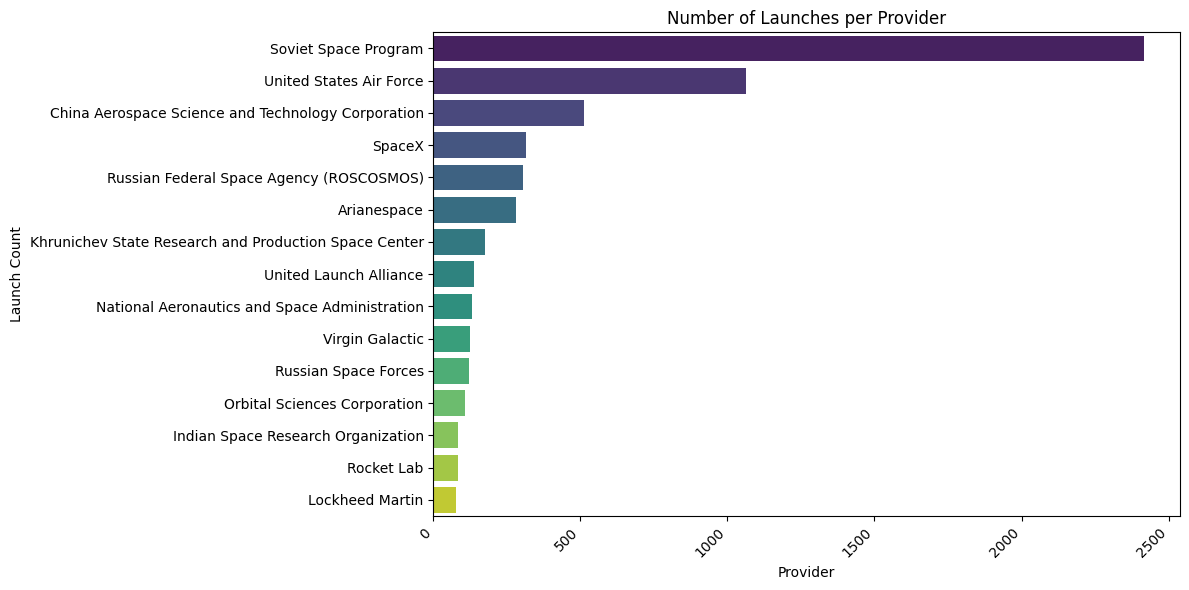

In [3]:
count = data['Provider'].value_counts().reset_index()
count.columns = ['Provider','Count']

plt.figure(figsize=(12,6))
sns.barplot(data=count[:15],x='Count',y='Provider',palette='viridis')

plt.title("Number of Launches per Provider")
plt.xlabel("Provider")
plt.ylabel("Launch Count")
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

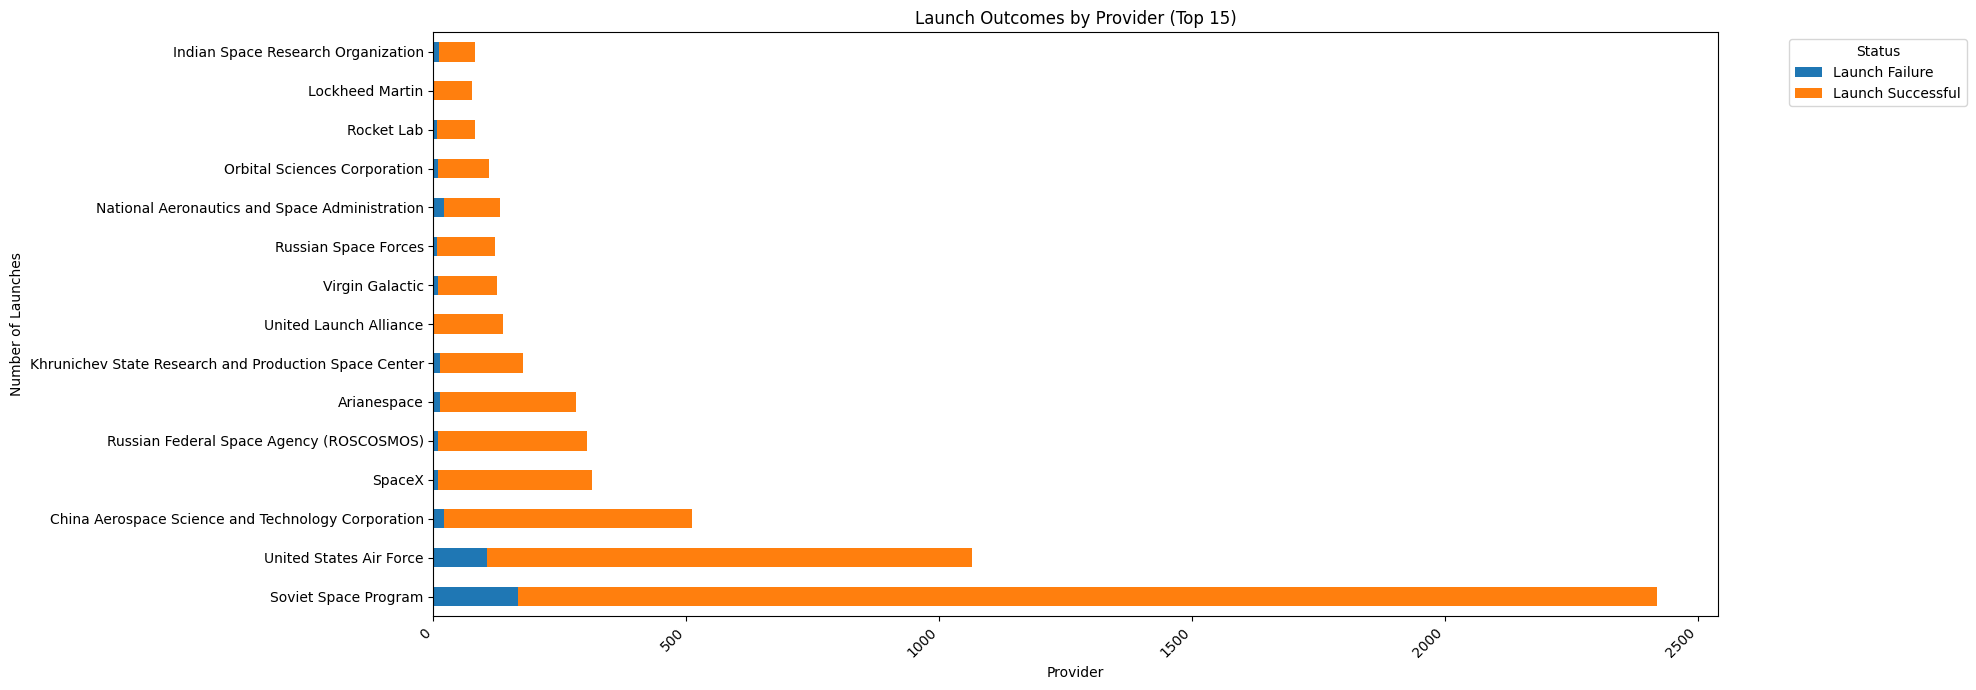

In [4]:
Success=data[['Status','Provider']]
status_counts=Success.groupby('Provider')['Status'].value_counts().unstack(fill_value=0)
sorted_status_counts=status_counts.sort_values(by="Launch Successful",ascending=False)
top=sorted_status_counts.head(15)
top.plot(kind="barh",stacked=True,figsize=(20,7))
plt.title("Launch Outcomes by Provider (Top 15)")
plt.xlabel("Provider")
plt.ylabel("Number of Launches")
plt.xticks(rotation=45,ha='right')
plt.legend(title="Status",bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.show()


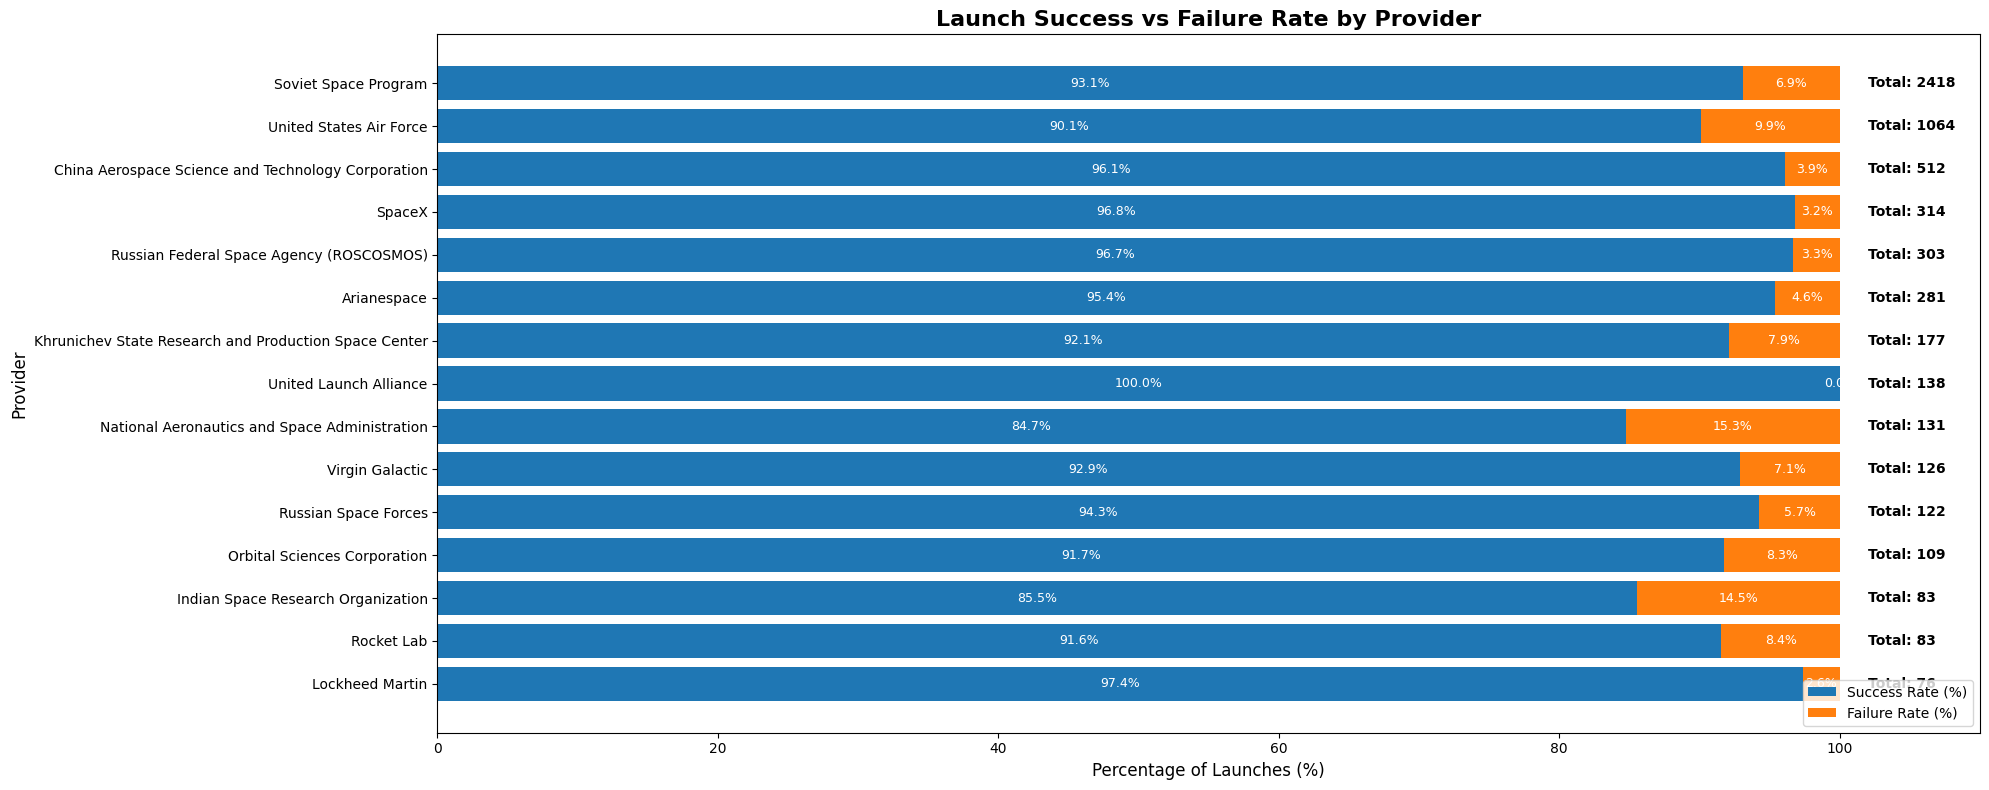

In [5]:
Success = data[['Status','Provider']]
status_counts = Success.groupby('Provider')['Status'].value_counts().unstack(fill_value=0)
for col in ["Launch Successful","Launch Failure"]:
    if col not in status_counts.columns:
        status_counts[col] = 0
status_counts["Total"] = status_counts.sum(axis=1)
status_counts["Success Rate (%)"] = (status_counts["Launch Successful"] / status_counts["Total"]) * 100
status_counts["Failure Rate (%)"] = (status_counts["Launch Failure"] / status_counts["Total"]) * 100
sorted_status_counts = status_counts.sort_values(by="Total",ascending=False)
top = sorted_status_counts.head(15).sort_values(by="Total")
plt.figure(figsize=(20,8))
plt.barh(top.index,top["Success Rate (%)"],label='Success Rate (%)')
plt.barh(top.index,top["Failure Rate (%)"],left=top["Success Rate (%)"],label='Failure Rate (%)')
for i,(s,f,total) in enumerate(zip(top["Success Rate (%)"],top["Failure Rate (%)"],top["Total"])):
    plt.text(s / 2,i,f"{s:.1f}%",va='center',ha='center',color='white',fontsize=9)
    plt.text(s + f / 2,i,f"{f:.1f}%",va='center',ha='center',color='white',fontsize=9)
    plt.text(102,i,f"Total: {total}",va='center',ha='left',color='black',fontsize=10,fontweight='bold')
plt.title("Launch Success vs Failure Rate by Provider",fontsize=16,weight='bold')
plt.xlabel("Percentage of Launches (%)",fontsize=12)
plt.ylabel("Provider",fontsize=12)
plt.xlim(0,110)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

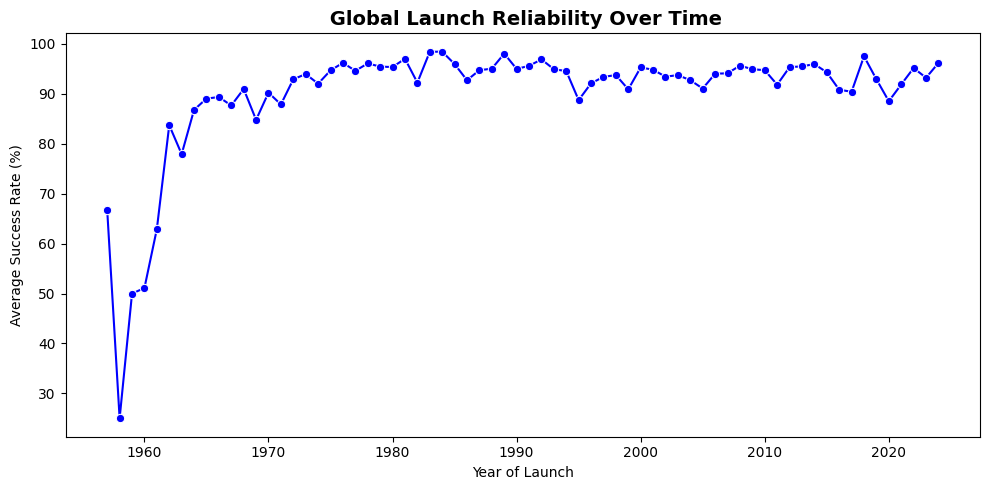

In [6]:
yearly = data.groupby('Year of launch')['Status'].value_counts().unstack(fill_value=0)
yearly['Success Rate (%)'] = (yearly['Launch Successful'] / yearly.sum(axis=1)) * 100
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly.index, y=yearly['Success Rate (%)'], marker='o', color='blue')
plt.title(' Global Launch Reliability Over Time', fontsize=14, weight='bold')
plt.xlabel('Year of Launch')
plt.ylabel('Average Success Rate (%)')
plt.tight_layout()
plt.show()


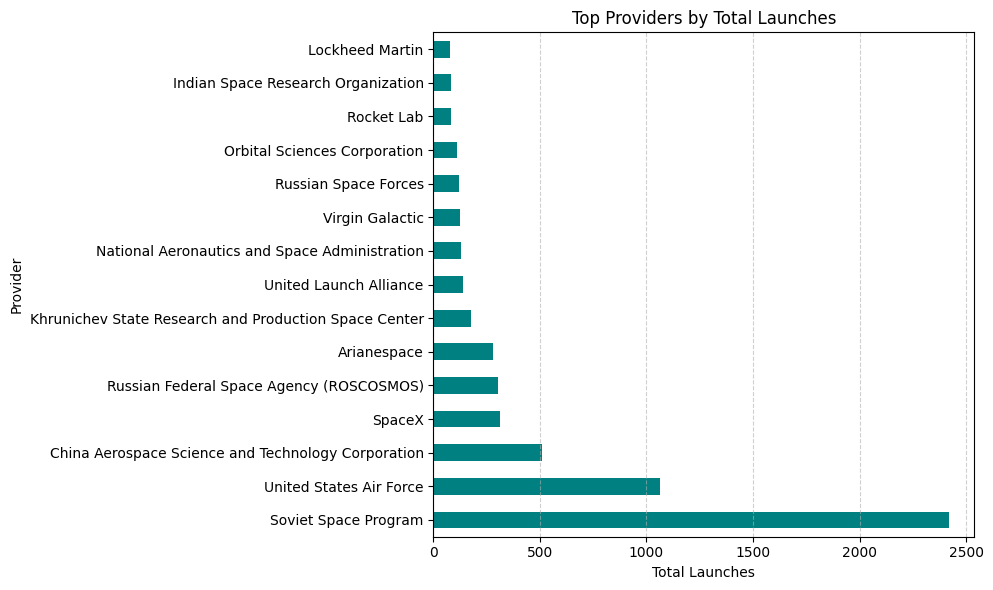

In [7]:
rocket_varients=data[['Rocket','Provider']]
veriations=rocket_varients.groupby('Provider')['Rocket'].value_counts().unstack(fill_value=0).to_dict(orient='index')
df = pd.DataFrame(veriations).fillna(0)
provider_totals = df.sum(axis=0).sort_values(ascending=False).head(15)
plt.figure(figsize=(10,6))
provider_totals.plot(kind='barh',color='teal')
plt.title("Top Providers by Total Launches")
plt.xlabel("Total Launches")
plt.ylabel("Provider")
plt.grid(axis='x',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

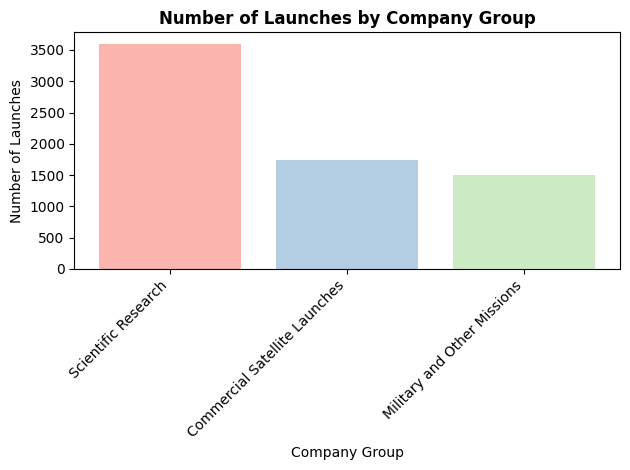

In [8]:
company_counts = data['Companey Group'].value_counts()
colors = plt.cm.Pastel1(range(len(company_counts)))

plt.bar(company_counts.index, company_counts.values, color=colors)
plt.title("Number of Launches by Company Group", weight='bold')
plt.xlabel("Company Group")
plt.ylabel("Number of Launches")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Nagasheshu\AppData\Local\Temp\ipykernel_13960\2611814749.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=ctype.index, x=ctype['Success Rate (%)'], palette='viridis')


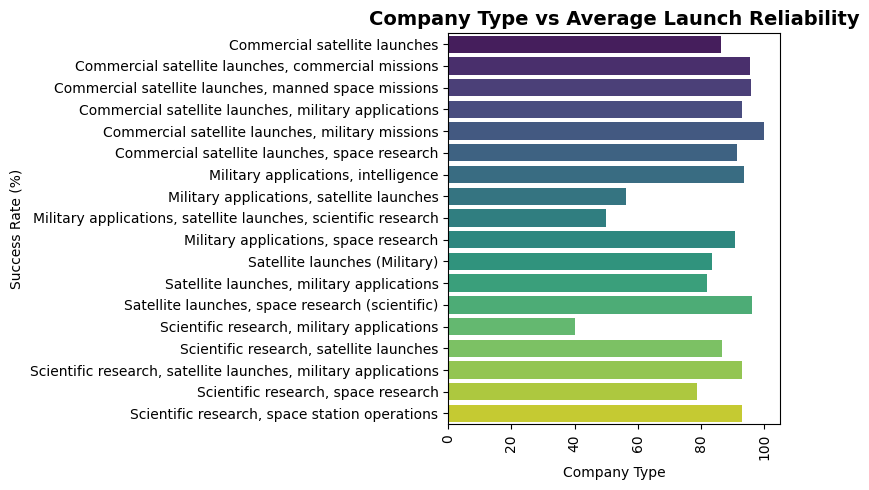

In [9]:
ctype = data.groupby('Companey Type')['Status'].value_counts().unstack(fill_value=0)
ctype['Success Rate (%)'] = (ctype['Launch Successful'] / ctype.sum(axis=1)) * 100

plt.figure(figsize=(8, 5))
sns.barplot(y=ctype.index, x=ctype['Success Rate (%)'], palette='viridis')
plt.title('Company Type vs Average Launch Reliability', fontsize=14, weight='bold')
plt.ylabel('Success Rate (%)')
plt.xlabel('Company Type',)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Reliability Index=0.8×Success Rate+0.2×(1−Standard Deviation of Annual Success Rate)

In [10]:
annual_success = (
    data.groupby(['Provider', 'Year of launch'])['Status']
    .apply(lambda x: (x == 'Launch Successful').mean())
    .unstack(fill_value=0)
)

success_rate = annual_success.mean(axis=1)
consistency = 1 - annual_success.std(axis=1)
reliability_index = (0.8 * success_rate + 0.2 * consistency) * 100
reliability_index.sort_values(ascending=False)


Provider
United States Air Force                                  63.005794
Arianespace                                              57.741447
Russian Federal Space Agency (ROSCOSMOS)                 47.703468
Soviet Space Program                                     46.787348
Khrunichev State Research and Production Space Center    44.119140
                                                           ...    
Payload Aerospace S.L.                                   18.751114
Royal Aircraft Establishment                             18.751114
Orienspace Technology                                    18.751114
Space Pioneer                                            18.751114
Weapons Research Establishment                           18.751114
Length: 90, dtype: float64

In [11]:
success_rate = annual_success.mean(axis=1)
print("Success Rate")
success_rate.sort_values(ascending=False)

Success Rate


Provider
United States Air Force                                  0.644854
Arianespace                                              0.589957
Russian Federal Space Agency (ROSCOSMOS)                 0.468359
Soviet Space Program                                     0.448766
Khrunichev State Research and Production Space Center    0.418207
                                                           ...   
Relativity Space                                         0.000000
Sandia National Laboratories                             0.000000
TiSPACE                                                  0.000000
Space One                                                0.000000
Space Services Inc.                                      0.000000
Length: 90, dtype: float64

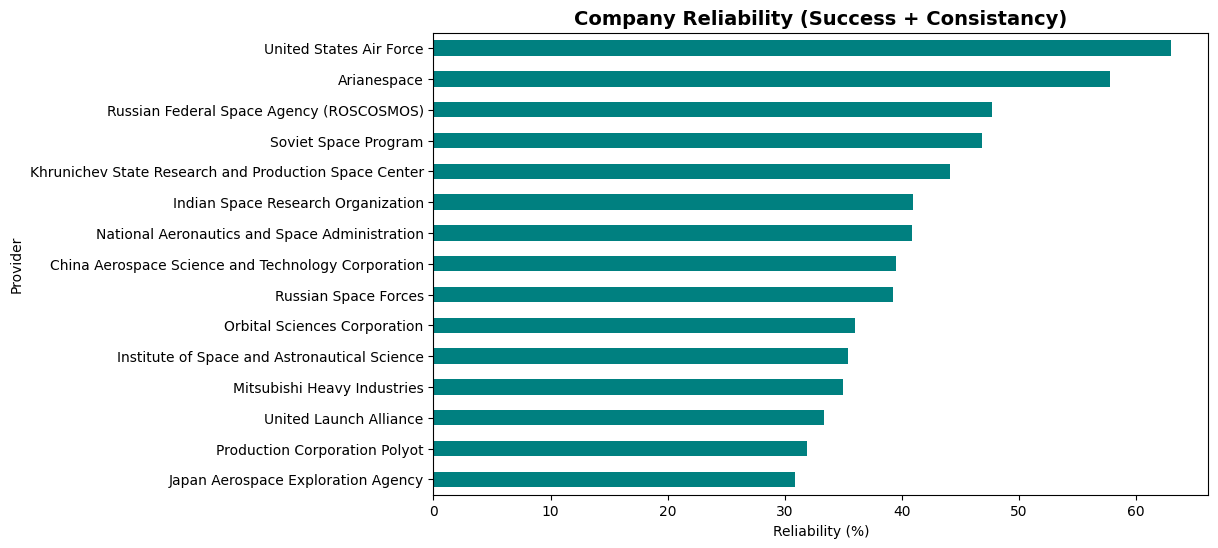

In [12]:
reliability_index.sort_values(ascending=False).head(15).plot(kind='barh', color='teal', figsize=(10,6))
plt.title("Company Reliability (Success + Consistancy)", fontsize=14, weight='bold')
plt.xlabel("Reliability (%)")
plt.ylabel("Provider")
plt.gca().invert_yaxis()
plt.show()


In [13]:
reliability_index = (0.7 * success_rate + 0.3 * consistency) * 100
print("Reliablity")
reliability_index.sort_values(ascending=False)

Reliablity


Provider
United States Air Force                                  62.265997
Arianespace                                              57.114329
Russian Federal Space Agency (ROSCOSMOS)                 48.137252
Soviet Space Program                                     47.742719
Khrunichev State Research and Production Space Center    45.268346
                                                           ...    
Korea Aerospace Research Institute                       26.881736
Orbital ATK                                              26.881736
Martin Marietta                                          26.881736
Italian Space Agency                                     26.881736
Rockwell International                                   26.881736
Length: 90, dtype: float64

In [14]:
print("Consistancy")
1-annual_success.std(axis=1).sort_values(ascending=False)

Consistancy


Provider
Russian Federal Space Agency (ROSCOSMOS)                 0.511737
Arianespace                                              0.527245
Indian Space Research Organization                       0.528313
National Aeronautics and Space Administration            0.531800
Khrunichev State Research and Production Space Center    0.533128
                                                           ...   
Relativity Space                                         1.000000
Sandia National Laboratories                             1.000000
TiSPACE                                                  1.000000
Space One                                                1.000000
Space Services Inc.                                      1.000000
Length: 90, dtype: float64